# Transforming data with symmetries
*Written by:* Johannes Borgqvist,<br>
*Date:* 2022-09-15.<br>
In this document, we consider two minimal models. The first one is the linear model
$$y(t)=Ct$$
where $t$ is the explanatory variable corresponding to the time, $y(t)$ is the response variable and $C\in\mathbb{R}$ is an arbitrary constant. We will compare this to the cubic model
$$y(t)=Ct^3.$$
From a symmetry perspective these two models are actually quite distinct, and also it is well-known that we can approximate a linear model with a cubic model and vice versa for certain ranges of $t$. So these two models might be well-suited for investigating the statistical properties of our proposed symmetry framework for model selection. Let's list the symmetry properties of our two models. 
## The linear model has a rotation symmetry
The ODE formulation of the linear model is:
$$\dfrac{\mathrm{d}y}{\mathrm{d}t}=\dfrac{y}{t}.$$
The infinitesimal generator of the rotation symmetry is given by
$$X_R=-y\partial_t+t\partial_y$$
and it generates the rotation symmetry $\Gamma_{\epsilon}^{R}$ given by
$$\Gamma_{\epsilon}^{R}:(t,y)\mapsto (t\cos(\epsilon)-y\sin(\epsilon),t\sin(\epsilon)+y\cos(\epsilon)).$$
Also, any rotated curve is given by the following equation
\begin{equation}
\hat{y}(t;\epsilon)=\hat{C}_1(\epsilon)t,\quad\hat{C}_1(\epsilon)=\left(\dfrac{\sin(\epsilon)+C\cos(\epsilon)}{\cos(\epsilon)-C\sin(\epsilon)}\right).
\end{equation}
## The cubic model has a scaling symmetry
The ODE formulation of the cubic model is:
$$\dfrac{\mathrm{d}y}{\mathrm{d}t}=\dfrac{3y}{t}.$$
The infinitesimal generator of the scaling symmetry is given by
$$X_S=t\partial_t+y\partial_y$$
and it generates the scaling symmetry $\Gamma_{\epsilon}^{S}$ given by
$$\Gamma_{\epsilon}^{R}:(t,y)\mapsto (t\exp(\epsilon),y\exp(\epsilon)).$$
Also, any scaled curve is given by the following equation
\begin{equation}
\hat{y}(t;\epsilon)=\hat{C}_2(\epsilon)t^3,\quad\hat{C}_2(\epsilon)=C\exp(-2\epsilon).
\end{equation}

So, let's investigate these models and their symmetries further!

## Plotting the action of our two symmetries

In [1]:
# Import packages
from numpy import * # For numerical calculations,
import matplotlib.pyplot as plt # For plotting,
from scipy import integrate # For solving ODEs.

Define general properties of both models.

In [2]:
# The time vector
t = linspace(-1,1,100)
# The arbitrary coefficient
C = 1
# The transformation parameter
eps_lin = pi/6
eps_cube = 0.5
# Define a nice epsilon vector that goes with the transformation parameter
eps_vec_lin = linspace(0,eps_lin,num=75,endpoint=True)
eps_vec_cube = linspace(0,eps_cube,num=75,endpoint=True)
# Define some magical indices that we want to transform
magical_indices_lin = [37, 40, 43, 55, 58, 61]

Let's define our linear model!

In [3]:
# The original curve of the linear model
y_lin_ori = array([C*t_temp for t_temp in t])
# Define the transformed parameter
C_hat_lin_1 = ((sin(eps_lin)+C*cos(eps_lin))/(cos(eps_lin)-C*sin(eps_lin)))
C_hat_lin_2 = ((sin(2*eps_lin)+C*cos(2*eps_lin))/(cos(2*eps_lin)-C*sin(2*eps_lin)))
# The transformed curve of the linear model
y_lin_hat = array([C_hat_lin_1*t_temp for t_temp in t])
# Allocate some memory for our rotation symmetry
rot = []
# Loop over our magical indices and start rotating
for magical_index in magical_indices_lin:
    # Extract the point we are transforming
    t_temp = t[magical_index]
    y_temp = y_lin_ori[magical_index]
    # Calculate our symmetry for the given point
    rot_temp = [array([t_temp*cos(eps_temp)-y_temp*sin(eps_temp) for eps_temp in eps_vec_lin]), array([t_temp*sin(eps_temp)+y_temp*cos(eps_temp) for eps_temp in eps_vec_lin])]
    # Append our lovely symmetry
    rot.append(rot_temp)
# Let's do a second transformation as well
# The transformed curve of the linear model
y_lin_hat_2 = array([C_hat_lin_2*t_temp for t_temp in t])
# Loop over our magical indices and start rotating
for magical_index in magical_indices_lin:
    # Extract the point we are transforming
    t_temp = t[magical_index]
    y_temp = y_lin_hat[magical_index]
    # Calculate our symmetry for the given point
    rot_temp = [array([t_temp*cos(eps_temp)-y_temp*sin(eps_temp) for eps_temp in eps_vec_lin]), array([t_temp*sin(eps_temp)+y_temp*cos(eps_temp) for eps_temp in eps_vec_lin])]
    # Append our lovely symmetry
    rot.append(rot_temp)

Let's define our cubic model!

In [4]:
# Do some magical indices close to 100
magical_indices_cube = [50,60,70,130,140,150]
# Define a new time vector for the cube
t_cube = linspace(-2,2,200)
# The original curve of the cubic model
y_cube_ori = array([C*t_temp**3 for t_temp in t_cube])
# Define the transformed parameter
C_hat_cube_1 = C*exp(-2*eps_cube)
# Define the transformed curve
y_cube_hat = array([C_hat_cube_1*t_temp**3 for t_temp in t_cube])

# Allocate some memory for our rotation symmetry
scaling = []
# Loop over our magical indices and start rotating
for magical_index in magical_indices_cube:
    # Extract the point we are transforming
    t_temp = t_cube[magical_index]
    y_temp = y_cube_ori[magical_index]
    # Calculate our symmetry for the given point
    scale_temp = [array([t_temp*exp(eps_temp) for eps_temp in eps_vec_cube]), array([y_temp*exp(eps_temp) for eps_temp in eps_vec_cube])]
    # Append our lovely symmetry
    scaling.append(scale_temp)
# Let's do another transformation    
# Define the transformed parameter
C_hat_cube_2 = C*exp(-4*eps_cube)
# Define the transformed curve
y_cube_hat_2 = array([C_hat_cube_2*t_temp**3 for t_temp in t_cube])    
# Loop over our magical indices and start rotating
for magical_index in magical_indices_cube:
    # Extract the point we are transforming
    t_temp = t_cube[magical_index]
    y_temp = y_cube_hat[magical_index]
    # Calculate our symmetry for the given point
    scale_temp = [array([t_temp*exp(eps_temp) for eps_temp in eps_vec_cube]), array([y_temp*exp(eps_temp) for eps_temp in eps_vec_cube])]
    # Append our lovely symmetry
    scaling.append(scale_temp)

Now, we can plot the action of our symmetries!

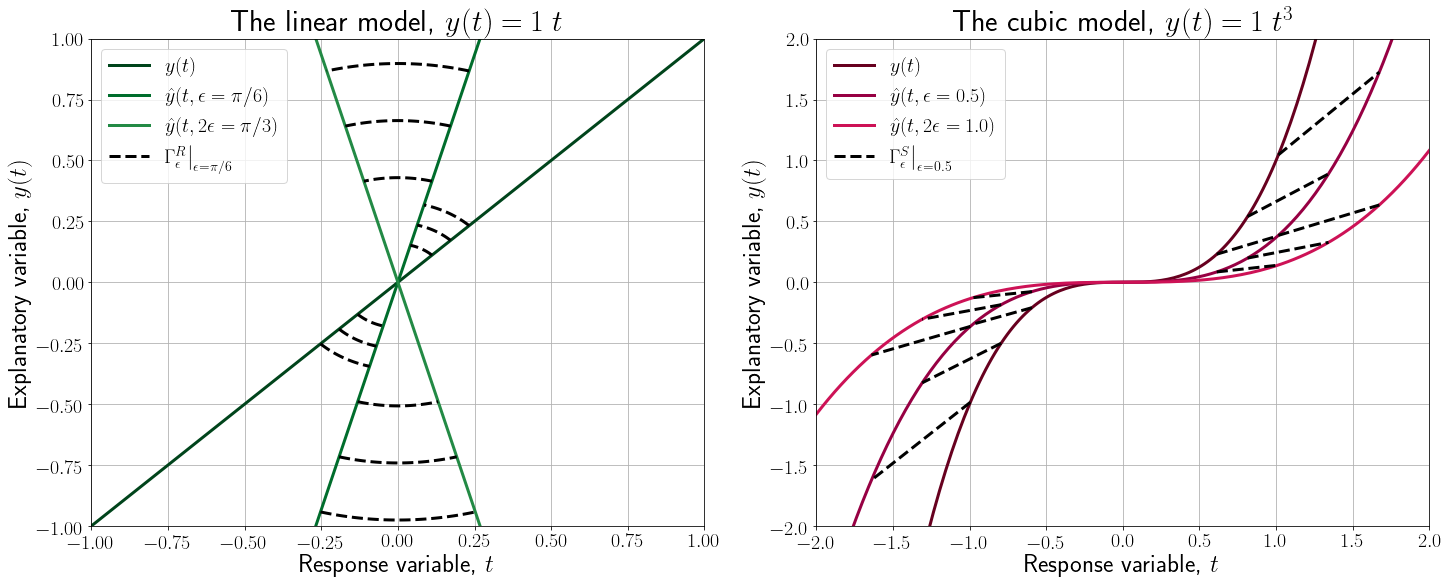

In [5]:
# Set all parameters to tex
plt.rcParams['text.usetex'] = True
# Define a figure window with two subfigures
fig_5, axs_5 = plt.subplots(1, 2, constrained_layout=True, figsize=(20, 8))
# The linear model
# The original solution
axs_5[0].plot(t, y_lin_ori, '-', label="$y(t)$" ,color=(0/256,68/256,27/256),linewidth=3.0)
# The transformed curve
axs_5[0].plot(t, y_lin_hat, '-', label="$\\hat{y}(t,\\epsilon=\\pi/6)$" ,color=(0/256,109/256,44/256),linewidth=3.0)
# The second transformed curve
axs_5[0].plot(t, y_lin_hat_2, '-', label="$\\hat{y}(t,2\\epsilon=\\pi/3)$" ,color=(35/256,139/256,69/256),linewidth=3.0)
# The rotation symmetry
for index in range(len(rot)):
    if index ==0:
        axs_5[0].plot(rot[index][0], rot[index][1], '--', label="$\\left.\\Gamma_{\\epsilon}^{R}\\right|_{\\epsilon=\\pi/6}$" ,color=(0/256,0/256,0/256),linewidth=3.0)
    else:
        axs_5[0].plot(rot[index][0], rot[index][1], '--',color=(0/256,0/256,0/256),linewidth=3.0)
axs_5[0].grid()
# Set the limits
axs_5[0].set_xlim([-1, 1])
axs_5[0].set_ylim([-1, 1])
# Legends and axes labels
axs_5[0].legend(loc='best',prop={"size":20})
axs_5[0].set_ylabel('Explanatory variable, $y(t)$',fontsize=25)
axs_5[0].set_xlabel('Response variable, $t$',fontsize=25)
# Change the size of the ticks
axs_5[0].tick_params(axis='both', which='major', labelsize=20)
axs_5[0].tick_params(axis='both', which='minor', labelsize=20)
# Title and saving the figure
axs_5[0].set_title("The linear model, $y(t)="+ str(C) + "\\;t$",fontsize=30,weight='bold');
# The cubic model
# The original cubic curve
axs_5[1].plot(t_cube, y_cube_ori, '-', label="$y(t)$" ,color=(103/256,0/256,31/256),linewidth=3.0)
# The transformed cubic curve
axs_5[1].plot(t_cube, y_cube_hat, '-', label="$\\hat{y}(t,\\epsilon=" + str(eps_cube)+ ")$" ,color=(152/256,0/256,67/256),linewidth=3.0)
# The second transformation
axs_5[1].plot(t_cube, y_cube_hat_2, '-', label="$\\hat{y}(t,2\\epsilon=" + str(2*eps_cube)+ ")$" ,color=(206/256,18/256,86/256),linewidth=3.0)
# The scaling symmetry
for index in range(len(scaling)):
    if index ==0:
        axs_5[1].plot(scaling[index][0], scaling[index][1], '--', label="$\\left.\\Gamma_{\\epsilon}^{S}\\right|_{\\epsilon=" + str(eps_cube)+ "}$" ,color=(0/256,0/256,0/256),linewidth=3.0)
    else:
        axs_5[1].plot(scaling[index][0], scaling[index][1], '--',color=(0/256,0/256,0/256),linewidth=3.0)
axs_5[1].grid()
# Set the limits
axs_5[1].set_xlim([-2, 2])
axs_5[1].set_ylim([-2, 2])
# Legends and axes labels
axs_5[1].legend(loc='best',prop={"size":20})
axs_5[1].set_ylabel('Explanatory variable, $y(t)$',fontsize=25)
axs_5[1].set_xlabel('Response variable, $t$',fontsize=25)
# Change the size of the ticks
axs_5[1].tick_params(axis='both', which='major', labelsize=20)
axs_5[1].tick_params(axis='both', which='minor', labelsize=20)
# Title and saving the figure
axs_5[1].set_title("The cubic model, $y(t)="+ str(C) + "\\;t^3$",fontsize=30,weight='bold');
